# 회귀 분석 진단

## 확률론적 선형 회귀 분석의 기본 가정

확률론적 선형 회귀 분석에서는 종속 변수와 독립 변수에 대해 다음과 같은 가정을 하고 있다.

## 가정 1. 종속 변수의 분포에 대한 가정

선형 회귀 분석의 기본 가정은 종속 변수가 독립 변수의 선형 조합으로 결정되는 기댓값과 고정된 분산을 가지는 정규 분포라는 것이다.

$$ y \sim \mathcal{N}(w^Tx, \sigma^2) $$


이는 오차(disturbance) $ \epsilon_i$ 개념으로 변환 하면 다음과 같다.

$$ \epsilon_i = y - w^Tx $$

* (1) 오차는 다음과 같은 모수를 가지는 정규 분포이다.
$$ y \sim \mathcal{N}(0, \sigma^2) $$

 * 기댓값은 0이다.
$$ \mu = w^Tx $$

 * 분산은 상수이다.
$$ \sigma^2 = \text{const.} $$

* (2) 오차와 독립 변수는 서로 독립이다.

$$ \text{E}[\epsilon \mid x] = 0 $$

* (3) 오차(disturbance)는 모수에 대해 조건부 독립이다.

$$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] =  0 $$



## 가정 2. 독립 변수에 대한 가정

독립 변수의 공분산 행렬은 full rank 이어야 한다. 즉, 서로 독립인 성분이 독립 변수의 갯수만큼 존재해야 한다.

## 선형 회귀 모형 진단

선형 회귀 모형의 진단(diagnosis)이란 선형 회귀에 사용된 데이터들이 이러한 선형 회귀 모형의 가정을 제대로 만족하고 있는지를 확인하는 과정이다. 진단은 보통 다음과 같은 검정들로 이루어진다.


1. 잔차에 대한 정규성 검정
2. 잔차에 대한 자기상관계수 검정
3. 독립 변수에 대한 condition number 계산



In [1]:
from sklearn.datasets import make_regression
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 04 Jun 2016   Prob (F-statistic):           2.21e-36
Time:                        23:09:27   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

## 기본 가정을 침해하는 문제들

### 이분산 문제

선형 회귀 모형에서는 종속 변수 값의 분산이 독립 변수의 값과 상관없이 고정된 값을 가져야한다. 그러나 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 이분산(heteroskedastic) 문제가 발생한다.


<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/Heteroscedasticity.png">

이분산 문제를 해결하는 방법 주의 하나는 종속 변수를 log 변환하거나 box-cox 변환하는 것이다.

[[school_notebook:3f485c426a4b49fc9de95a02137ca6b4]]

### 자기 상관 계수 문제

선형 회귀 모형에서는 오차(disturbance)들이 서로 (모수-조건부) 독립이라고 가정하고 있다. 따라서 잔차(residual)도 서로 독립이어야 한다. 만약 서로 독립이 아니라면 기본 선형 회귀 모형이 아닌 ARMA 모형 등의 시계열 모형을 사용해야 한다.

서로 독립인지는 잔차를 시계열로 가정하여 자기상관계수를 구한다. 독립 가정을 만족하면 시차(lag)가 0인 경우를 제외하고는 자기상관계수 $\rho_l$ 이 0이어야 한다. 이를 검사하는 검증으로는 다음과 같은 것들이 있다.

* Box-Pierce 검정
* Ljung-Box 검정
* Durbin-Watson

이 검정들은 다음과 같은 귀무 가설을 검증한다.

$$
H_0: \rho_l = 0 \;\;\;\text{ for all } i, i \neq 0
$$


[[school_notebook:3ea68ac37aa846e58a8c330aad0bdbd1]]

### 다중공선성 문제

다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다. 이는 독립 변수의 공분산 행렬이 full rank 이어야 한다는 조건을 침해한다.

독립 변수가 서로 의존하게 되면 이른바 과최적화(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해치게 된다. 이를 방지하는 방법들은 다음과 같다.

* 변수 선택법으로 의존적인 변수 삭제
* PCA(principal component analysis) 방법으로 의존적인 성분 삭제
* regularized 방법 사용

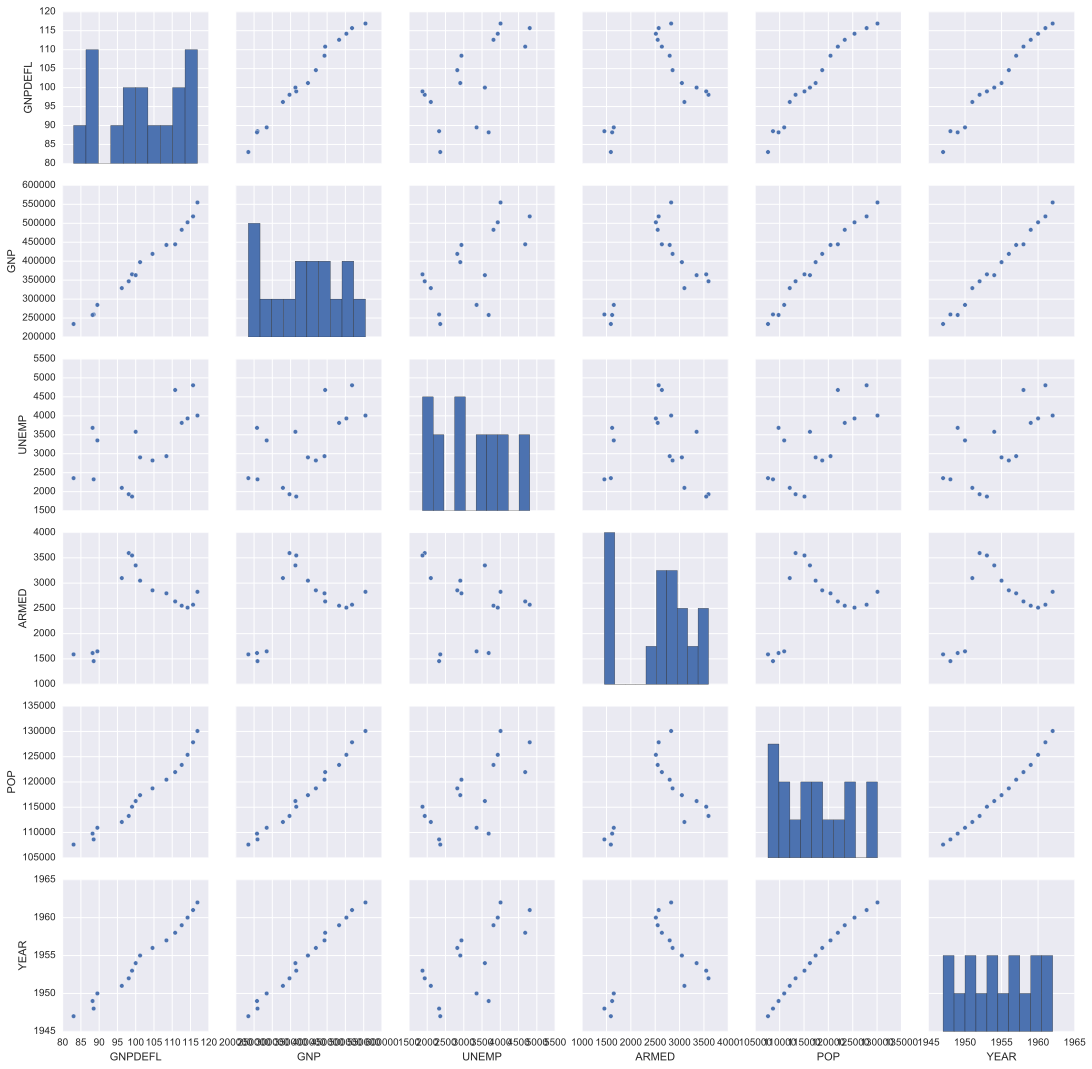

In [9]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
sns.pairplot(X)
plt.show()

In [10]:
X = sm.add_constant(X)
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sat, 04 Jun 2016   Prob (F-statistic):           4.98e-10
Time:                        23:40:21   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0